# Introduction to dimensionality reduction using Ivis

In [ ]:
!pip install ivis

In [1]:
# Ivis uses several stochastic processes.
# To make sure that results are consistent from one run to another,
# we fix the random seed

import os
os.environ["PYTHONHASHSEED"]="1234"

import random
import numpy as np

import tensorflow as tf

np.random.seed(1234)
random.seed(1234)
tf.random.set_seed(1234)

In [2]:
import matplotlib.pyplot as plt

from ivis import Ivis

## 1. Data import

In this notebook we'll use the Reuters Corpus Volume I (RCV1) dataset - an archive of over 800,000 manually categorized newswire stories made available by Reuters, Ltd. for research purposes. For more information on the dataset and its structure, checkout the [scikit-learn description](https://scikit-learn.org/stable/datasets/real_world.html#rcv1-dataset).

In [13]:
from sklearn.datasets import fetch_rcv1
from sklearn.decomposition import TruncatedSVD
from sklearn.utils import resample

> **NOTE**: This is a large download and can take some time 

In [4]:
rcv1 = fetch_rcv1()
rcv1.data.shape

(804414, 47236)

In [21]:
X, y = resample(rcv1.data, rcv1.target, replace=False, n_samples=10000, random_state=1234)

In [22]:
X = TruncatedSVD(n_components=150, random_state=1234).fit_transform(X)

## 2. Dimensionality reduction using Ivis

In [23]:
ivis = Ivis(model='maaten', n_epochs_without_progress=5)
ivis.fit(X)

 40%|████      | 4025/10000 [00:00<00:00, 40243.99it/s]

Building KNN index


100%|██████████| 10000/10000 [00:00<00:00, 41142.61it/s]


Extracting KNN neighbours


100%|██████████| 10000/10000 [00:02<00:00, 4497.05it/s]


Training neural network
Epoch 1/1000
79/79 [==============================] - 4s 35ms/step - loss: 1.5965
Epoch 2/1000
79/79 [==============================] - 3s 36ms/step - loss: 1.3387
Epoch 3/1000
79/79 [==============================] - 3s 35ms/step - loss: 1.0953
Epoch 4/1000
79/79 [==============================] - 3s 35ms/step - loss: 1.0601
Epoch 5/1000
79/79 [==============================] - 3s 35ms/step - loss: 1.0462
Epoch 6/1000
79/79 [==============================] - 3s 35ms/step - loss: 1.0421
Epoch 7/1000
79/79 [==============================] - 3s 35ms/step - loss: 1.0435
Epoch 8/1000
79/79 [==============================] - 3s 36ms/step - loss: 1.0294
Epoch 9/1000
79/79 [==============================] - 3s 36ms/step - loss: 0.9823
Epoch 10/1000
79/79 [==============================] - 3s 35ms/step - loss: 0.8361
Epoch 11/1000
79/79 [==============================] - 3s 36ms/step - loss: 0.7320
Epoch 12/1000
79/79 [==============================] - 3s 35ms/step - lo

Ivis(annoy_index_path='annoy.index', callbacks=[], model='maaten',
     n_epochs_without_progress=5,
     neighbour_matrix=<ivis.data.neighbour_retrieval.knn.AnnoyKnnMatrix object at 0x7f1e34f4fda0>)

## 3. Visualise Ivis embeddings

In [24]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [25]:
embeddings = ivis.transform(X)

79/79 [==============================] - 0s 5ms/step


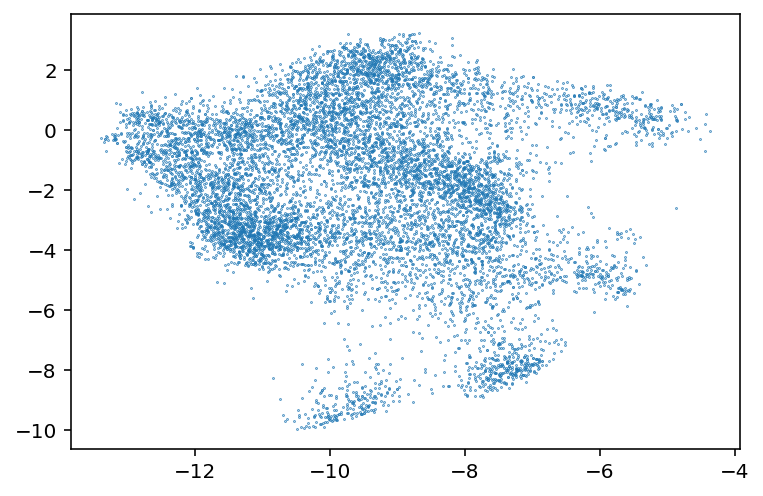

In [27]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=0.1)